# Dataload and import library

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [8]:
## 본인의 디렉토리에 맞게 설정하세요 
data = pd.read_csv('C:/Users/j3eun/OneDrive/Desktop/tobigs/assignment_2.csv')
data.head()


,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [9]:
y = data.Label
#data['salary']=data['salary'].apply(lambda x : x/10000)

In [10]:
y

0      1
1      0
2      1
3      0
4      0
5      0
6      0
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     1
22     0
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
170    0
171    1
172    0
173    0
174    0
175    1
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    1
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    1
194    0
195    0
196    0
197    0
198    1
199    1
Name: Label, Length: 200, dtype: int64

# Logistic regression 해야하는 data 의 scatter plot

In [11]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]


C:\Users\j3eun\Anaconda3\envs\Herobots\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


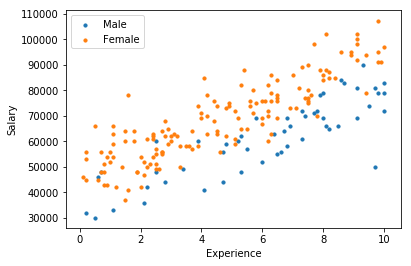

In [12]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [13]:
## 독립변수들
X = data.iloc[:, 1:]

# rescaled_X 
normalized_X = (X[['experience','salary']]-X[['experience','salary']].mean())/X[['experience','salary']].std()
normalized_X['bias'] = X['bias']
cols = normalized_X.columns.tolist()
cols = cols[-1:] + cols[:-1]
normalized_X = normalized_X[cols]
normalized_X = normalized_X.values.tolist()
X= np.array(normalized_X)


#Basic_X
# X = X.values.tolist()
# X = np.array(X)
#X

# 종속변수 Target = T 
T = data['Label']
T = T.values.tolist()
T = np.array(T)
#T

# 회귀계수
beta = np.random.randn(3)
#beta= np.array([1,1,1])
#beta
print(X.shape)

(200, 3)


## 회귀식
## $$ a_n=B^TX = \hat{B}_0 +\hat{B}_1x_1 +\hat{B}_2x_2 ,    \quad\mbox{n=데이터 수}$$




In [14]:
# 내적 -> 회귀계수와 X의 선형결합 
a = X.dot(beta)
print(a.shape)

(200,)


## $$ \mbox 로그오즈 = 회귀식을\  p에\  대해서\  정리 $$
## $$ log(Odds) = \hat{B}_0 +\hat{B}_1x_1 + \hat{B}_2x_2 $$
## $$ \mbox P는 \ 로지스틱 \ 함수 $$
## $$ P = \frac{\mathrm{1} }{\mathrm{1} + e^{-a_n}} = \sigma(x,B) $$ 

SyntaxError: invalid syntax (<ipython-input-15-0d3f44af8632>, line 1)

In [16]:
'''
함수를 구현하세요 
INPUT: 회귀식(a)
Output: P
'''
def log_odds(a):
        return 1 / (1+ np.exp(a))
p=log_odds(a)
print(p)

[0.45243981 0.35073362 0.35367669 0.2407361  0.17624997 0.13581079
 0.11172788 0.1130145  0.08574531 0.05587494 0.42063912 0.41217024
 0.05204119 0.1711668  0.401032   0.08791643 0.18393463 0.19938954
 0.46336539 0.15303239 0.23326816 0.12699297 0.18241096 0.28418112
 0.07960365 0.1516443  0.10418994 0.33621679 0.07393603 0.23480976
 0.09066745 0.43048612 0.45190725 0.44368145 0.0900907  0.44725922
 0.3874408  0.1470163  0.30400141 0.19776887 0.11722118 0.32106482
 0.45243981 0.38211054 0.42207368 0.18889391 0.267039   0.11194142
 0.48731884 0.10029556 0.32106482 0.11996506 0.19438006 0.31605405
 0.17804777 0.34283931 0.35109441 0.32247236 0.28342218 0.36616215
 0.10987729 0.05961066 0.30719497 0.12031195 0.15674992 0.33251482
 0.34500945 0.11760811 0.1141995  0.1018065  0.14217427 0.13943648
 0.06816596 0.53407976 0.15796522 0.11360565 0.11279917 0.24498048
 0.23664443 0.43813086 0.33525786 0.2444785  0.26557988 0.15048347
 0.10413714 0.24897881 0.49602886 0.33609051 0.18840901 0.2526

## $$ \mbox 각\  데이터가\  따르는\  확률분포를\   label\  y와\  엮어서\  표현  $$

## $$ P(x_i,y_i | B) = \begin{cases} \sigma(x,B)^{y}, & \mbox{if }y\mbox{ = 1} \\ (1-\sigma(x,B))^{1-y}, & \mbox{if }y\mbox{ = 0} \end{cases} $$

## $$ \mbox 위의 \ 확률분포를 \ 따르는 \   데이터에서 \ 얻은 \ Likelihood  $$

## $$ L = \sigma(x,B)^{y}(1-\sigma(x,B))^{1-y} $$ 

## $$ \mbox log 변환  $$

## $$ L^*=log(L) = y\sigma(x,B) + (1-y)(1-\sigma(x,B)) $$ 

## $$ \mbox Convex\  function으로\  만들기\  위한 \ (-) 곱   $$

## $$ \mbox J는\ Loss\ Function  $$

## $$ J= - L^* $$

## $$ \mbox Loss\ function \ = \ Negative\ log \ likelihood\  $$

## $$ \mbox N개의 \ 데이터에\ 대한\ Negative\ Likelihood  $$
## $$ J(x_i,y_i|B) = -\sum_{i=1}^N y_i\sigma(x_i,B)- \sum_{i=1}^N(1-y_i)(1-\sigma(x_i,B)) $$ 


In [18]:
'''
Negative_Likelihood를 구현하세요
INPUT: P, Y(LABEL)
OUTPUT : 각 데이터들의 Negative_Likelihood 값의 합

'''
def negative_likelihood(p,y):
    sum1=np.sum(np.log(p)*y)
    sum2=np.sum((1-y)*np.log(1-p))
    sumt= -sum1-sum2
    return sumt
negative_likelihood= negative_likelihood(p,y)
print(negative_likelihood)
#def negative_likelihood1(p,y):
#    return np.sum(np.log(p)*y)
#sum1=negative_likelihood1(p,y)
#def negative_likelihood2(p,y):
#    return np.sum((1-y)*np.log(1-p))
#sum2=negative_likelihood2(p,y)
#negative_likelihood = -(sum1+sum2)
#negative_likelihood

153.1903047996914


## Loss function 에 대한 Gradient를 구하기 위한 작업 

## $$ \mbox J를 \ B에 \ 대해서\ 편미분  $$

## $$ \mbox J는 \ P에 \ 대한\ 함수이고, \ P는 \ a에 \ 대한 \ 함수이고,\ a는\ B에 \ 대한\ 함수  $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} $$ 

## $${\partial J\over\partial P_i} = \frac{y_i}{P_i}- \frac{1-y_i}{1-P_i} ,\quad {\partial P_i\over\partial a_i} = P_i(1-P_i), \quad {\partial a_i\over\partial B}=X^T $$ 

## $$ \mbox 또한 \ B는 \ B_0,\ B_1,\ B_2이\  있어서\ 각각\ 편미분    $$
## $$ \mbox 간단하게 \  표현하면   $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} = - X^T(y-P) =  X^T(P-y)$$ 

array([ 0.18115032,  1.79982946, -1.66419616])

In [28]:
'''
위에서 구한 Negative Likelihood 함수를 각각 베타에 편미분하여 Gradient를 계산하고
Learning_rate와 곱하여 회귀계수를 업데이트 해주세요.
회귀계수가 업데이트 될 때 마다, P도 다시 업데이트 되야 합니다. 
'''
learning_rate=0.01
iteration = 50
def gradient(X,p,y, learning_rate, iteration):
    for i in range(iteration):
        jb=np.dot(np.transpose(X),np.array(p-y))
        beta_learn=beta-learning_rate*jb
        a=X.dot(beta_learn)
        p=log_odds(a)
    return beta_learn
beta_learn=gradient(X,p,y,learning_rate, iteration)
#print(beta_learn)
a = X.dot(np.array(beta_learn))
#print(a)
p=log_odds(a)
print(p)
#nl= negative_likelihood(p,y)
#nl


[ 1.25841208  1.73900558 -0.06991065]
[0.78285916 0.63402381 0.55899139 0.31266489 0.13841381 0.10290137
 0.06039021 0.04491252 0.03088751 0.01420309 0.76831737 0.66029024
 0.01395327 0.13128994 0.70347226 0.02533695 0.15304976 0.20238851
 0.75679388 0.13365469 0.2376309  0.10608987 0.12745204 0.43523543
 0.02229217 0.1667761  0.02647219 0.5673742  0.038359   0.20197255
 0.01781303 0.66431572 0.79158094 0.77229798 0.03291191 0.79083762
 0.78977359 0.07149194 0.54564111 0.17019708 0.0642201  0.52421182
 0.78285916 0.72112295 0.81991661 0.24516688 0.49546347 0.05750208
 0.75130885 0.04580351 0.52421182 0.12603083 0.25664431 0.5489856
 0.15871727 0.50381786 0.72524225 0.48517904 0.34761376 0.57508858
 0.06013539 0.01686065 0.45476173 0.05045322 0.23531243 0.553438
 0.66846328 0.09029477 0.08142136 0.04834064 0.04769352 0.17843321
 0.03228376 0.83531494 0.13470017 0.06064603 0.04719998 0.2916591
 0.23844703 0.70010754 0.59273791 0.4104531  0.31947349 0.05908955
 0.04182007 0.19653589 0.837

In [51]:
X.T.shape

(3, 200)

0     -0.152769
1      0.784418
2     -0.423474
3      0.381874
4      0.124501
5      0.157687
6      0.077467
7      0.030462
8     -0.966081
9     -0.978243
10     0.880769
11     0.635149
12    -0.972033
13     0.120724
14     0.792239
15     0.016807
16     0.139930
17     0.228117
18     0.748905
19     0.202424
20     0.192254
21    -0.778033
22     0.082649
23     0.538994
24    -0.982199
25    -0.634596
26     0.008901
27     0.674767
28    -0.882376
29     0.109993
         ...   
170    0.163209
171   -0.705566
172    0.113464
173    0.094936
174    0.368134
175   -0.954824
176    0.342692
177    0.704809
178    0.794168
179    0.310553
180    0.106588
181    0.533183
182    0.357333
183    0.100069
184   -0.545660
185    0.815302
186    0.190458
187    0.766094
188    0.270732
189    0.557843
190    0.723904
191    0.031337
192    0.208177
193   -0.171872
194    0.011485
195    0.066547
196    0.111702
197    0.201500
198   -0.930128
199   -0.970059
Name: Label, Length: 200

C:\Users\j3eun\Anaconda3\envs\tobigs\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


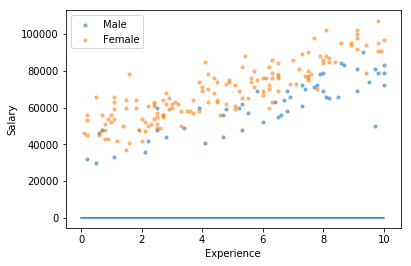

In [54]:
'''추정된 회귀계수가 beta=[B0,B2,B3]이라면, 다음 코드를 통해 시각화가 가능합니다'''


fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male',alpha=0.5)
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female',alpha=0.5)
#plt.scatter(X[:,1], X[:,2],c=T , s=10, alpha=0.8)
x_axis = np.linspace(0, 10,50)
y_axis = -(beta[0] + x_axis*beta[1]) / beta[2]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()





### 직접 구현을 한 rough한 GD이기 때문에 성능이 안좋을 수 있습니다
### 초기값에 매우 민감하며, 기타 하이퍼 파라미터에 따라 성능이 달라집니다